In [1]:
import bokeh.io
import bokeh.plotting
import sys
import glob 
import os 
import scipy.io as sio
import numpy as np
import decimal as dc
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.io as sio

import tifffile as tiff

from  tifffile  import  TiffWriter
import matplotlib.pyplot as plt

from bokeh.models import Legend

from pathlib import Path

from scipy.stats import norm

# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:

def DFF(stack,nframes,bframes,Lx,Ly):

    baselineVideo = np.zeros((bframes,Lx,Ly), dtype=np.double)
    DFFtrialVideo = np.zeros((nframes,Lx,Ly), dtype=np.double)
    
    for n in range(bframes):
        baselineVideo[n,:,:] = np.asarray(stack[n,:,:],dtype=np.double)
        
    meanImg =np.mean(baselineVideo, axis = 0)
    
    for n in range(nframes):
        DFFtrialVideo[n,:,:] = np.divide(np.subtract(stack[n,:,:],meanImg),meanImg)
    
    
    return DFFtrialVideo;  

In [3]:
mouseName = 'GF187'

behavpath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\data\\' + mouseName + '\\Recordings\\BehaviourFiles\\'

imaging_days = glob.glob(os.path.join(behavpath, "GF*"))

for n, f in enumerate(imaging_days):
    imaging_days[n] = os.path.basename(f)
    
SwitchingDay = imaging_days[1]


behav_path = behavpath + SwitchingDay + '\\BehavResults.mat'

print(behav_path)

beh = sio.loadmat(behav_path)

vals = beh['BehavResults'][0,0]

keys = beh['BehavResults'][0,0].dtype.descr

beh = np.array(vals[keys[0][0]][:][:])

performance = np.array(beh[:,9])
performance = performance.astype(int)
stim = np.array(beh[:,5])
stim = stim.astype(int)
whstim = np.array(beh[:,6])
whstim = whstim.astype(int)
audstim =  np.array(beh[:,7])
audstim = audstim.astype(int)


StopSession = False
TrialNumber = len(beh)
RecentTrials = 20
WhHitChunk = np.zeros(TrialNumber)
AudHitChunk = np.zeros(TrialNumber)
FAChunk = np.zeros(TrialNumber)
dprime = np.zeros(TrialNumber)
print('Number of Trials ' + str(TrialNumber))

for n in range(TrialNumber):

    ChunkPer = performance[np.max([0,n-RecentTrials]) : (n+1)]
    ChunkStim = stim[np.max([0,n-RecentTrials]) : (n+1)]
    ChunkWhStim = whstim[np.max([0,n-RecentTrials]) : (n+1)]
    ChunkAuStim = audstim[np.max([0,n-RecentTrials]) : (n+1)]
    WhHitChunk[n] = sum((ChunkPer == 2))/sum((ChunkWhStim == 1))        
    AudHitChunk[n] = sum((ChunkPer == 3))/sum((ChunkAuStim == 1))
    FAChunk[n] = sum((ChunkPer == 5))/sum((ChunkStim == 0))
    Half_WhHit = 0.5/(sum((ChunkPer == 2)) + sum((ChunkPer == 0)))
    Half_FA = 0.5/(sum((ChunkPer == 5)) + sum((ChunkPer == 4)) ) 

    if WhHitChunk[n] == 1:

        WHit = 1-Half_WhHit

    elif WhHitChunk[n] == 0:

        WHit = Half_WhHit
    else:
        WHit = WhHitChunk[n]

    if FAChunk[n] == 1:

        FA = 1-Half_FA

    elif FAChunk[n] == 0:

        FA = Half_FA

    else:
        FA = FAChunk[n]

    dprime[n] = norm.ppf(WHit) - norm.ppf(FA)
    


\\sv1files.epfl.ch\Petersen-Lab\data\GF187\Recordings\BehaviourFiles\GF187_24052019\BehavResults.mat
Number of Trials 761


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in long_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in long_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1914: RuntimeWarning: invalid value encountered in greater
  cond1 = (0 < q) & (q < 1)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1914: RuntimeWarning: invalid value encountered in less
  cond1 = (0 < q) & (q < 1)


In [5]:
imaging_days

['GF187_23052019',
 'GF187_24052019',
 'GF187_27052019',
 'GF197_29052019',
 'GF187_21052019',
 'GF187_22052019',
 'GF187_29052019']

In [4]:
Pos = []
PosFound = False
for n,d in enumerate(dprime):
    
    if ((d > 1.0) and (not(np.isnan(d))) and (not(PosFound))) :
        
        Pos.append(n)
        PosFound = True
        
    if d < 1.0 and (not(np.isnan(d))) :
        
        PosFound = False
        
#PosInd = Pos[-2]

In [5]:
Pos = [250]


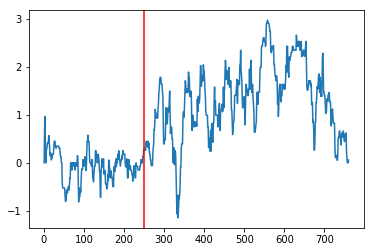

In [6]:
plt.plot(dprime)
for i in range(len(Pos)):
    plt.axvline(Pos[i], color = 'r')

In [6]:
Pos

[278,
 285,
 305,
 310,
 348,
 351,
 383,
 425,
 437,
 441,
 476,
 503,
 531,
 586,
 679,
 719]

In [9]:
Pos[0]

500

In [7]:
PosIndx = 250

nframes = 211
bframes = 60

datapath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\data\\' + mouseName + '\\Recordings\\Imaging\\'
behavpath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\data\\' + mouseName + '\\Recordings\\BehaviourFiles\\'
localpath = 'D:\\Foustoukos\\' + mouseName + '\\'

print('Reading raw data from : ' + datapath)
print('Reading processed data from : ' + localpath)
print('Calculating day : ' + SwitchingDay)


#read the ops1 for this day

ops_path = localpath + SwitchingDay + '\\suite2p\\'   

print('Reading the ops file from : ' + ops_path)

ops_name= glob.glob(os.path.join(ops_path, "ops1*"))

for n,f in enumerate(ops_name):
    ops_name[n] = os.path.basename(f)

ops_path_load = ops_path + ops_name[0]

ops = np.load(ops_path_load,allow_pickle=True).item()

#read the frame numbers for this day 
frames_path = datapath + SwitchingDay + '\\TrialFrames.mat'

frames = sio.loadmat(frames_path)


numOfFrames = frames['NumOfFrames']


numOfFrames = np.array(numOfFrames)

#read the behaviour results for this day
behav_path = behavpath + SwitchingDay + '\\BehavResults.mat'

print(behav_path)

beh = sio.loadmat(behav_path)

vals = beh['BehavResults'][0,0]

keys = beh['BehavResults'][0,0].dtype.descr

beh = np.array(vals[keys[0][0]][:][:])

performance = beh[:,9]


#Split the perfomance into to parts depending on the dprime

perfBefore = performance[:PosIndx]
perfAfter = performance[PosIndx:]

#Analysis before dprime crossing

WMbef = np.array([])
WHbef= np.array([])
AHbef = np.array([])
AMbef = np.array([])
FAbef = np.array([])
CRbef = np.array([])

for m in range(len(perfBefore)):

    if perfBefore[m] == 0.0:
        WMbef = np.append(WMbef,np.sum(numOfFrames[0:m]))
    elif perfBefore[m] == 1.0:
        AMbef = np.append(AMbef,np.sum(numOfFrames[0:m]))
    elif perfBefore[m] == 2.0:
        WHbef = np.append(WHbef,np.sum(numOfFrames[0:m]))
    elif perfBefore[m] == 3.0:
        AHbef = np.append(AHbef,np.sum(numOfFrames[0:m]))
    elif perfBefore[m] == 4.0:
        CRbef = np.append(CRbef,np.sum(numOfFrames[0:m]))
    elif perfBefore[m] == 5.0:
        FAbef = np.append(FAbef,np.sum(numOfFrames[0:m]))
        
        
#Analysis after dprime crossing

WMaft = np.array([])
WHaft= np.array([])
AHaft = np.array([])
AMaft = np.array([])
FAaft = np.array([])
CRaft = np.array([])

for m in range(len(perfAfter)):

    if perfAfter[m] == 0.0:
        WMaft = np.append(WMaft,np.sum(numOfFrames[0:(PosIndx + m)]))
    elif perfAfter[m] == 1.0:
        AMaft = np.append(AMaft,np.sum(numOfFrames[0:(PosIndx + m)]))
    elif perfAfter[m] == 2.0:
        WHaft = np.append(WHaft,np.sum(numOfFrames[0:(PosIndx + m)]))
    elif perfAfter[m] == 3.0:
        AHaft = np.append(AHaft,np.sum(numOfFrames[0:(PosIndx + m)]))
    elif perfAfter[m] == 4.0:
        CRaft = np.append(CRaft,np.sum(numOfFrames[0:(PosIndx + m)]))
    elif perfAfter[m] == 5.0:
        FAaft = np.append(FAaft,np.sum(numOfFrames[0:(PosIndx + m)]))
    
    

Reading raw data from : \\sv1files.epfl.ch\Petersen-Lab\data\GF187\Recordings\Imaging\
Reading processed data from : D:\Foustoukos\GF187\
Calculating day : GF187_24052019
Reading the ops file from : D:\Foustoukos\GF187\GF187_24052019\suite2p\
\\sv1files.epfl.ch\Petersen-Lab\data\GF187\Recordings\BehaviourFiles\GF187_24052019\BehavResults.mat


In [8]:
Lx = ops['Lx']
Ly = ops['Ly']


#for WMiss
with open(ops['reg_file'], 'rb') as binary_file:

    nbytestoread = 2*Lx*Ly

    WM_mean_movie_bef = np.zeros((nframes, Ly, Lx), dtype = 'int16')
    WM_mean_movieDFF_bef = np.zeros((nframes, Ly, Lx), dtype = 'int16')

    print('Calculating WMbef')

    for cframe in range(nframes):

        frame_seq = np.zeros((len(WMbef), Ly, Lx), dtype = 'int16')

        for fr in range(len(WMbef)):

            bytes = int(nbytestoread*(WMbef[fr] + cframe))

            binary_file.seek(bytes,0)
            buff = binary_file.read(nbytestoread)
            frame = np.reshape(np.frombuffer(buff, dtype = np.int16, offset = 0),(Ly,Lx))
            frame_seq[fr,:,:] = frame

        meanframe = np.mean(frame_seq, axis = 0)

        WM_mean_movie_bef[cframe,:,:] = meanframe

WM_mean_movieDFF_bef = DFF(WM_mean_movie_bef,nframes,bframes,Lx,Ly)

savepath = localpath + SwitchingDay + '\\suite2p\\' 

finalpathWM = savepath + SwitchingDay + '_' + 'WM_bef.tiff'
finalpathWMDFF = savepath + SwitchingDay + '_' + 'WM_DFF_bef.tiff'


with TiffWriter(finalpathWM, bigtiff=True) as tif:

    tif.save(WM_mean_movie_bef, photometric='minisblack')

with TiffWriter(finalpathWMDFF, bigtiff=True) as tif:

    tif.save(WM_mean_movieDFF_bef, photometric='minisblack')
    
    
    
    
    
with open(ops['reg_file'], 'rb') as binary_file:

    nbytestoread = 2*Lx*Ly

    WM_mean_movie_aft = np.zeros((nframes, Ly, Lx), dtype = 'int16')
    WM_mean_movieDFF_aft = np.zeros((nframes, Ly, Lx), dtype = 'int16')
    

    print('Calculating WMaft')

    for cframe in range(nframes):

        frame_seq = np.zeros((len(WMaft), Ly, Lx), dtype = 'int16')

        for fr in range(len(WMaft)):

            bytes = int(nbytestoread*(WMaft[fr] + cframe))

            binary_file.seek(bytes,0)
            buff = binary_file.read(nbytestoread)
            frame = np.reshape(np.frombuffer(buff, dtype = np.int16, offset = 0),(Ly,Lx))
            frame_seq[fr,:,:] = frame

        meanframe = np.mean(frame_seq, axis = 0)

        WM_mean_movie_aft[cframe,:,:] = meanframe

WM_mean_movieDFF_aft = DFF(WM_mean_movie_aft,nframes,bframes,Lx,Ly)

savepath = localpath + SwitchingDay + '\\suite2p\\' 

finalpathWM = savepath + SwitchingDay + '_' + 'WM_aft.tiff'
finalpathWMDFF = savepath + SwitchingDay + '_' + 'WM_DFF_aft.tiff'


with TiffWriter(finalpathWM, bigtiff=True) as tif:

    tif.save(WM_mean_movie_aft, photometric='minisblack')

with TiffWriter(finalpathWMDFF, bigtiff=True) as tif:

    tif.save(WM_mean_movieDFF_aft, photometric='minisblack')


Calculating WMbef
Calculating WMaft


In [9]:
#for WHiss
with open(ops['reg_file'], 'rb') as binary_file:

    nbytestoread = 2*Lx*Ly

    WH_mean_movie_bef = np.zeros((nframes, Ly, Lx), dtype = 'int16')
    WH_mean_movieDFF_bef = np.zeros((nframes, Ly, Lx), dtype = 'int16')

    print('Calculating WHbef')

    for cframe in range(nframes):

        frame_seq = np.zeros((len(WHbef), Ly, Lx), dtype = 'int16')

        for fr in range(len(WHbef)):

            bytes = int(nbytestoread*(WHbef[fr] + cframe))

            binary_file.seek(bytes,0)
            buff = binary_file.read(nbytestoread)
            frame = np.reshape(np.frombuffer(buff, dtype = np.int16, offset = 0),(Ly,Lx))
            frame_seq[fr,:,:] = frame

        meanframe = np.mean(frame_seq, axis = 0)

        WH_mean_movie_bef[cframe,:,:] = meanframe

WH_mean_movieDFF_bef = DFF(WH_mean_movie_bef,nframes,bframes,Lx,Ly)

savepath = localpath + SwitchingDay + '\\suite2p\\' 

finalpathWH = savepath + SwitchingDay + '_' + 'WH_bef.tiff'
finalpathWHDFF = savepath + SwitchingDay + '_' + 'WH_DFF_bef.tiff'


with TiffWriter(finalpathWH, bigtiff=True) as tif:

    tif.save(WH_mean_movie_bef, photometric='minisblack')

with TiffWriter(finalpathWHDFF, bigtiff=True) as tif:

    tif.save(WH_mean_movieDFF_bef, photometric='minisblack')
    
    
    
    
    
with open(ops['reg_file'], 'rb') as binary_file:

    nbytestoread = 2*Lx*Ly

    WH_mean_movie_aft = np.zeros((nframes, Ly, Lx), dtype = 'int16')
    WH_mean_movieDFF_aft = np.zeros((nframes, Ly, Lx), dtype = 'int16')
    

    print('Calculating WHaft')

    for cframe in range(nframes):

        frame_seq = np.zeros((len(WHaft), Ly, Lx), dtype = 'int16')

        for fr in range(len(WHaft)):

            bytes = int(nbytestoread*(WHaft[fr] + cframe))

            binary_file.seek(bytes,0)
            buff = binary_file.read(nbytestoread)
            frame = np.reshape(np.frombuffer(buff, dtype = np.int16, offset = 0),(Ly,Lx))
            frame_seq[fr,:,:] = frame

        meanframe = np.mean(frame_seq, axis = 0)

        WH_mean_movie_aft[cframe,:,:] = meanframe

WH_mean_movieDFF_aft = DFF(WH_mean_movie_aft,nframes,bframes,Lx,Ly)

savepath = localpath + SwitchingDay + '\\suite2p\\' 

finalpathWH = savepath + SwitchingDay + '_' + 'WH_aft.tiff'
finalpathWHDFF = savepath + SwitchingDay + '_' + 'WH_DFF_aft.tiff'


with TiffWriter(finalpathWH, bigtiff=True) as tif:

    tif.save(WH_mean_movie_aft, photometric='minisblack')

with TiffWriter(finalpathWHDFF, bigtiff=True) as tif:

    tif.save(WH_mean_movieDFF_aft, photometric='minisblack')


Calculating WHbef
Calculating WHaft
